## Obs Station Metadata

In [32]:
# %matplotlib nbagg

import re
from obspy import UTCDateTime, read_inventory
from obspy.clients.nrl import NRL
from obspy.io.xseed import Parser
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.clients.fdsn import Client as FDSNClient


In [33]:
# could be replaced with a local download of NRL
nrl = NRL()

### Example to find out correct keys for given sensor in NRL

In [36]:
print(nrl.sensors)

manufacturer = input("\nChoose manufacturer: ");print("\n_______________________________")

Select the sensor manufacturer (39 items):
  'CEA-DASE', 'CME (now R-Sensors)', 'Chaparral Physics',
  'DTCC (manuafacturers of SmartSolo)', 'EQMet', 'Eentec', 'GEObit',
  'GEOsig', 'GaiaCode', 'Gem', 'Generic', 'Geo Space/OYO', 'Geodevice'
  'Geotech', 'Guralp', 'HGS Products', 'High Tech', 'Hyperion',
  'IESE', 'Johnson Infrasound', 'Kinemetrics', 'LaHusen', 'Lennartz',
  'Lunitek', 'Magseis Fairfield', 'Metrozet', 'Nanometrics',
  'R-Sensors (previously listed as CME', 'REF TEK',
  'Raspberry Shake (formerly OSOP)', 'SARA', 'Seismo Wave',
  'Sercel/Mark Products', 'Silicon Audio', 'SolGeo',
  'Sprengnether (now Eentec)', 'Streckeisen', 'TDG', 'iTem'

Choose manufacturer: Streckeisen

_______________________________


In [37]:
print(nrl.sensors[manufacturer])

sensor = input("\nChoose sensor: ");print("\n_______________________________")

Select the Streckeisen sensor model (5 items):
  'STS-1', 'STS-2', 'STS-2.5', 'STS-3', 'STS-5A'

Choose sensor: STS-2

_______________________________


In [38]:
print(nrl.sensors[manufacturer][sensor])

sensitivity = input("\nChoose sensitivity: ");print("\n_______________________________")


Select the sensor sensitivity in V/m/s (2 items):
  '1500', '20000'

Choose sensitivity: 1500

_______________________________


In [10]:
print(nrl.sensors[manufacturer][sensor][sensitivity])


generation = input("\nChoose generation: ");print("\n_______________________________")

Select the generation of electronics used in this STS-2 (3 items):
  '1 - installed 01/90 to 09/94', '2 - installed 09/94 to 04/97',
  '3 - installed 04/97 to present'

Choose generation: 3 - installed 04/97 to present

_______________________________


In [11]:
nrl.sensors[manufacturer][sensor][sensitivity][generation]

('STS-2, 120 s, 1500 V/m/s, generation 3 electronics',
 'http://ds.iris.edu/NRL/sensors/streckeisen/RESP.XX.NS085..BHZ.STS2_gen3.120.1500')

In [12]:
print(nrl.dataloggers)

datalogger = input("\nChoose datalogger: ");print("\n_______________________________")

Select the datalogger manufacturer (29 items):
  'Agecodagis', 'CNSN', 'DAQ Systems (NetDAS)',
  'DTCC (manufacturers of SmartSolo', 'DiGOS/Omnirecs', 'EQMet',
  'Earth Data', 'Eentec', 'GEObit', 'Gem', 'Generic', 'GeoSIG',
  'Geodevice', 'Geotech', 'Guralp', 'Kinemetrics', 'Lunitek',
  'Magseis Fairfield', 'Nanometrics', 'Quanterra', 'R-Sensors',
  'REF TEK', 'Raspberry Shake (formerly OSOP)', 'Seismic Source',
  'SeismologyResearchCentre', 'Sercel', 'SolGeo', 'TDG',
  'WorldSensing'

Choose datalogger: REF TEK

_______________________________


In [15]:
print(nrl.dataloggers[datalogger])

model = input("\nChoose datalogger model: ");print("\n_______________________________")

Select the REF TEK model (6 items):
  'RT 125 & 125A', 'RT 130 & 130-SMA', 'RT 130S & 130-SMHR',
  'RT 72A-06', 'RT 72A-07', 'RT 72A-08'

Choose datalogger model: RT 130 & 130-SMA

_______________________________


In [16]:
print(nrl.dataloggers[datalogger][model])

gain = input("\nChoose datalogger gain: ");print("\n_______________________________")

Select the preamplifier gain setting (2 items):
  '1', '32'

Choose datalogger gain: 1

_______________________________


In [17]:
print(nrl.dataloggers[datalogger][model][gain])

sampling_rate = input("\nChoose datalogger sampling rate: ");print("\n_______________________________")

Select the sample rate in samples per second for this channel (13 items):
  '1', '10', '100', '1000', '125', '20', '200', '25', '250', '40', '5'
  '50', '500'

Choose datalogger sampling rate: 200

_______________________________


In [18]:
print(nrl.dataloggers[datalogger][model][gain][sampling_rate])

('RT130, gain 1, 200 sps', 'http://ds.iris.edu/NRL/dataloggers/reftek/RESP.XX.NR010..HHZ.130.1.200')


In [19]:
[datalogger, model, gain, sampling_rate]

['REF TEK', 'RT 130 & 130-SMA', '1', '200']

In [20]:
response = nrl.get_response(
    datalogger_keys=[datalogger, model, gain, sampling_rate],
    sensor_keys=[manufacturer, sensor, sensitivity, generation]
    )

No handles with labels found to put in legend.


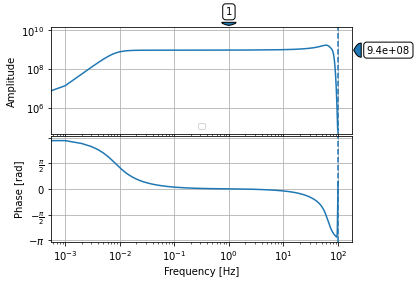

In [21]:
response.plot(0.001);

### Prepare Writing XML-File

In [27]:
net = input("\nEnter network: ");print("\n_______________________________")

sta = input("\nEnter station name: ");print("\n_______________________________")

site_name = input("\nEnter site name: ");print("\n_______________________________")

serial_number = input("\nEnter serial number: ");print("\n_______________________________")

outpath = input("\nEnter path of output file: ");print("\n_______________________________")

location = input("\nSpecify geographic location (y/n)? ")

if location == "y" or location == "yes":
    lat = input("Enter latitude: ")
    lon = input("Enter longitude: ")
    ele = input("Enter elevation: ")
    
else:
    lat, lon, ele = 0.0, 0.0, 0.0

outfile = f"{serial_number}_{sta}.xml"


Enter network: BW

_______________________________

Enter station name: STS2

_______________________________

Enter site name: 

_______________________________

Enter serial number: 1111

_______________________________

Enter path of output file: /home/brotzer/Desktop/

_______________________________

Specify location (y/n)? n


In [28]:
channel1 = Channel(code='HHZ', 
                   location_code='', 
                   latitude=lat, 
                   longitude=lon,
                   elevation=ele, 
                   depth=0,
#                    azimuth=0,
#                    dip=-90,
                   sample_rate=sampling_rate,
                   response=response,
                  )

channel2 = Channel(code='HHN', 
                   location_code='', 
                   latitude=lat, 
                   longitude=lon,
                   elevation=ele, 
                   depth=0,
#                    azimuth=0,
#                    dip=0,
                   sample_rate=sampling_rate,
                   response=response,
                  )

channel3 = Channel(code='HHE', 
                   location_code='', 
                   latitude=lat, 
                   longitude=lon,
                   elevation=ele, 
                   depth=0,
#                    azimuth=90,
#                    dip=0,
                   sample_rate=sampling_rate,
                   response=response,
                  )

In [29]:
site = Site(name=site_name)


station = Station(code=sta, 
                  latitude=lat, 
                  longitude=lon,
                  elevation=ele,
                  channels=[channel1,channel2,channel3],
                  site=site,
                 )

network = Network(code=net,
                  stations=[station],
                 )


inv = Inventory(networks=[network], 
                source='LMU',
               )


if outpath[-1] == "/":
    outpath = outpath[:-1]

inv.write(f"{outpath}/{outfile}", 
          format='STATIONXML',
         )

In [30]:
try:
    read_inventory(f"{outpath}/{outfile}")
    print("\n DONE")
except:
    print("\n Something went wrong! File: {outpath}/{outfile} could not be loaded!")

Inventory created at 2022-02-01T17:14:19.351084Z
	Created by: ObsPy 1.2.1
		    https://www.obspy.org
	Sending institution: LMU
	Contains:
		Networks (1):
			BW
		Stations (1):
			BW.STS2 ()
		Channels (3):
			BW.STS2..HHZ, BW.STS2..HHN, BW.STS2..HHE


 DONE


In [70]:

def parse_response(line):
    key, type_, data = line.split(None, 2)
    if type_ == 'NRL':
        match = re.search(r'\[([^\]]*)\] \[([^\]]*)\]', data)
        args = []
        for group in match.groups():
            keys = re.findall(r"'([^']*)'", group)
            args.append(keys)
        response = nrl.get_response(*args)
    else:
        raise NotImplementedError()
    return key, response


In [71]:

def add_station(network, line):
    
    parts = line.split(None, 4)
    code, lat, lon, elevation, site_description = parts
    lat = float(lat)
    lon = float(lon)
    elevation = float(elevation)
    site = Site(name=site_description)
    
    sta = Station(code=code, latitude=lat, longitude=lon, elevation=elevation,
                  channels=[], site=site)
    network.stations.append(sta)

    return sta


In [75]:

def add_channels(station, line):
    parts = line.split()
    loc, stream_label, components, azims, start, end, depth, sampling_rate, resp_key = parts
    if loc == 'None':
        loc = ''
    if azims == 'None':
        azi1 = 0
        azi2 = 0
        azi3 = 90
    start = UTCDateTime(start)
    if end == 'None':
        end = None
    else:
        end = UTCDateTime(end)
    depth = float(depth)
    sampling_rate = float(sampling_rate)
    response = responses[resp_key]
    for component, azi, dip in zip(components, (azi1, azi2, azi3), (-90, 0, 0)):
        cha = Channel(
            code=stream_label + component, location_code=loc, start_date=start, end_date=end,
            latitude=station.latitude, longitude=station.longitude, elevation=station.elevation,
            depth=depth, azimuth=azi, dip=dip, sample_rate=sampling_rate, response=response)
        station.channels.append(cha)
        # update station epoch times
        if station.start_date is None:
            station.start_date = cha.start_date
        else:
            station.start_date = min(station.start_date, cha.start_date)
        if station.end_date is None:
            station.end_date = cha.end_date
        else:
            station.end_date = max(station.end_date, cha.end_date)


In [78]:
# set up all responses
responses = {}

for line in response_lookup.splitlines():
    key, response = parse_response(line)
    responses[key] = response

In [ ]:
# assemble all epochs

inventory = Inventory(networks=[], source='EDB')

lines = data.splitlines()
network = None
station = None

while lines:
    line = lines.pop(0)
    if line.startswith('  '):
        add_channels(station, line)
    elif line.startswith(' '):
        station = add_station(network, line)
    else:
        network = Network(code=line, stations=[])
        inventory.networks.append(network)

In [ ]:
inventory.write('/tmp/example_stationxml_inventory.xml', format='STATIONXML')